# Exercise 2: Logistic Regression and Regularization

In this problem set, logistic regression will be used to classify points in 2 data sets:
* Student admissions to a university based on their scores on 2 exams
* Microchip acceptance based on two tests of the chip


### Imports


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Problem 1: Logistic Regression for Student Admissions

#### Load Data

In [2]:
! head -5 ex2data1.txt # look at document formatting using shell commands, separate on ','

34.62365962451697,78.0246928153624,0
30.28671076822607,43.89499752400101,0
35.84740876993872,72.90219802708364,0
60.18259938620976,86.30855209546826,1
79.0327360507101,75.3443764369103,1


In [3]:
datafile = 'ex2data1.txt'
data1 = np.loadtxt(datafile, delimiter=',')
data1[0:5,:] # check to see if successfully loaded

array([[ 34.62365962,  78.02469282,   0.        ],
       [ 30.28671077,  43.89499752,   0.        ],
       [ 35.84740877,  72.90219803,   0.        ],
       [ 60.18259939,  86.3085521 ,   1.        ],
       [ 79.03273605,  75.34437644,   1.        ]])

In [4]:
X = data1[:, 0:2]
y = data1[:,2].reshape((X.shape[0],1))# format into an mx1 matrix
print(X[0:2,:])
print(y[0:2,:])  

[[ 34.62365962  78.02469282]
 [ 30.28671077  43.89499752]]
[[ 0.]
 [ 0.]]


#### Plot Data

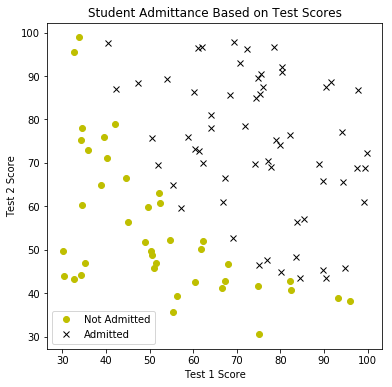

In [5]:
def plotData(X,n):
    plt.figure(figsize=(6,6))
    plt.plot(X[y[:,0]==0,n],X[y[:,0]==0,n+1],'yo', label='Not Admitted') #make sure to specify y dimesions specifically
    plt.plot(X[y[:,0]==1,n],X[y[:,0]==1,n+1],'kx', label='Admitted')
    plt.title('Student Admittance Based on Test Scores')
    plt.xlabel('Test 1 Score')
    plt.ylabel('Test 2 Score')
    plt.legend(loc='best')
    
    # n is used to index x, which changes after adding row of ones. Is there a more elegant way? sure

plotData(X,0)

Upon plotting the data, there is a noticeable boundary in the data. It is our job to implement the logistic regression to find a decision boundary for this data.

#### Learning Functions

In [6]:
def sigmoid(X):
    """X: int, np array
       returns sigmoid of x"""
    return 1 / (1 + np.exp(-X)) # don't need complicated iteration, I discovered
    #can also use expit from scipy.special

In [7]:
def h(X,theta):
    """Hypothesis function with signoid and dot product of X and theta"""
    return sigmoid(np.dot(X,theta))

In [8]:
def cost(theta, X, y, lamda=0.):
    """Returns the cost of the function evaluated at X, y, theta, and lambda. For no regularization, lambda stays zero.
        X: np array of testing examples
        y: np array of testing results
        theta: np array of theta values
        lamda: int, lambda, the regularization hyperparameter"""
    m = X.shape[0]
    regterm = lamda / (2 * m) * np.dot(theta[1:].T, theta[1:])
    J = -1 / m * (np.dot(y.T, np.log(h(X, theta))) + np.dot((1 - y).T, np.log(1 - h(X, theta)))) + regterm
    return float(J)

While doing this cost function, I had to remind myself why we were using both the log() and sigmoid functions.
* -log(h) is used when y = 1 to map h to a the range of values: infinity at h=0 to 0 at h=1
* -log(1-h) is used when y = 0 to map h to a the range of values: zero at h=0 to infinity at h=1

The h in those equations is h = sigmoid(X, theta):
* sigmoid is used to map negative values on a curve asymptotic to zero and positive values to a curve asymptotic to 1

For each iteration, the training examples are multiplied by theta, and the sigmoid is applied. It returns a values of 0 to 1 (with few in between) for each entry. The logarithm is taken, which returns a cost is somewhere between zero and infinity.

In [9]:
def grad(theta, X, y, lamda=0.):
    """Returns the gradient of the cost function evaluated at theta.
        X: np array of testing examples
        y: np array of testing results
        theta: np array of theta values
        lamda: int, lambda, the regularization hyperparameter"""
    #y = y.reshape(y.shape[0],-1)
    m = X.shape[0]
    gradient = np.zeros((X.shape[1],1)) #theta.shape

    gradient[0,0] = 1 / m * np.dot(X[:,0].T, (h(X, theta)- y[:,0]))
    gradient[1:,0] = 1 / m * np.dot(X[:,1:].T, (h(X, theta) - y[:,0])) + lamda / m * theta[1:] 
    return gradient   

In [10]:
def mapFeature(X1, X2, degree=1):
    """Written for only 2 features, when X1 and X2 are two columns of the same length. 
       For degree = 1 adds column of 1's in front.
       Returns Xout: matrix with ones in first column and all features multiplied out to 'degree' degree."""
    
    Xout = np.ones((X1.shape[0],1)) #make first column of ones
    for i in range(1, degree+1):
        for j in range(0,i+1):
            newcol = (X1**(i-j) * X2**j).reshape((Xout.shape[0],1))
            Xout = np.hstack((Xout,newcol))
    return Xout

In [11]:
from scipy import optimize

def optimizeTheta(theta_init, X, y, lamda=0):
    theta_init.resize((3,1))
    result = optimize.fmin(cost, x0=theta_init, args=(X, y, lamda), maxiter=400, full_output=True)
    return result[0], result[1]

#### Fitting Model Using External Optimization Function

In [12]:
X = mapFeature(X[:,0],X[:,1]) # adding row of ones can also be done with np.insert
X[0:3,:]

array([[  1.        ,  34.62365962,  78.02469282],
       [  1.        ,  30.28671077,  43.89499752],
       [  1.        ,  35.84740877,  72.90219803]])

In [13]:
theta_init = np.zeros((X.shape[1],1))
print(theta_init)

[[ 0.]
 [ 0.]
 [ 0.]]


In [14]:
# with initial value of theta:
cost(theta_init,X,y)

0.6931471805599452

In [15]:
theta, lowcost = optimizeTheta(theta_init, X, y)

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 157
         Function evaluations: 287


In [16]:
theta #correct

array([-25.16130062,   0.20623142,   0.20147143])

#### Plotting Decision Boundary

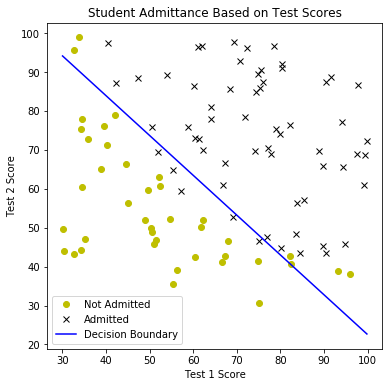

In [17]:
#decision boundary occurs when h(X, theta) = 0.5, or when X dot theta = 0. rearranging: x2 = (theta0 + theta1*x1)/-theta2
plt_x = np.array([np.min(X[:,1]),  np.max(X[:,1])])
plt_y = -(theta[0] + theta[1] * plt_x) * 1/theta[2]
plotData(X,1)
plt.plot(plt_x,plt_y, 'b-', label='Decision Boundary')
plt.legend()

### Problem 2: Regularized Logistic Regression for Microchip Manufacture

#### Load Data

In [18]:
! head -2 ex2data2.txt

0.051267,0.69956,1
-0.092742,0.68494,1


#### Plot Data

In [19]:
datafile = 'ex2data2.txt'
data = np.loadtxt(datafile, delimiter=',')
data[0:2,:]

array([[ 0.051267,  0.69956 ,  1.      ],
       [-0.092742,  0.68494 ,  1.      ]])

In [20]:
X = data[:,0:2]
y = data[:,2].reshape(X.shape[0],1)
Xmap = mapFeature(X[:,0],X[:,1],6)
theta_init = np.zeros((Xmap.shape[1],1))
Xmap.shape

(118, 28)

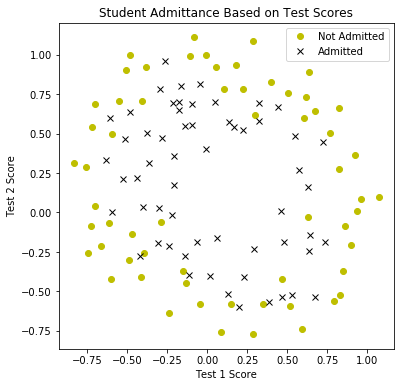

In [21]:
plotData(X,0)

In [22]:
cost(theta_init, Xmap, y) # good initialization

0.6931471805599453

#### Fitting Model Using Regularization Function

In [23]:
theta_ans, nfuneval, rc = optimize.fmin_tnc(func=cost, x0=theta_init, fprime=grad, args=(Xmap, y, 1))  

In [24]:
theta_ans #optimal value of theta

array([ 1.27271027,  0.62529965,  1.18111686, -2.019874  , -0.91743189,
       -1.43166929,  0.12393227, -0.36553118, -0.35725404, -0.17516292,
       -1.45817009, -0.05098418, -0.61558556, -0.27469165, -1.19271299,
       -0.24217841, -0.20603301, -0.04466178, -0.27778949, -0.29539514,
       -0.45645981, -1.04319154,  0.02779373, -0.29244868,  0.0155576 ,
       -0.32742405, -0.1438915 , -0.92467487])

I tried to used gradient descent to calculate as well, but there was some implementation conflict between Numpy and the gradient so that either gradient descent or the optimization function would run. The other would give a dimensions mismatch error.

#### Plot Decision Boundary

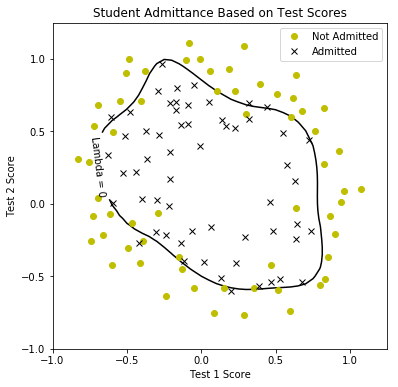

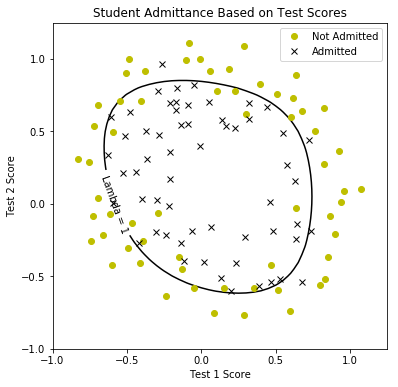

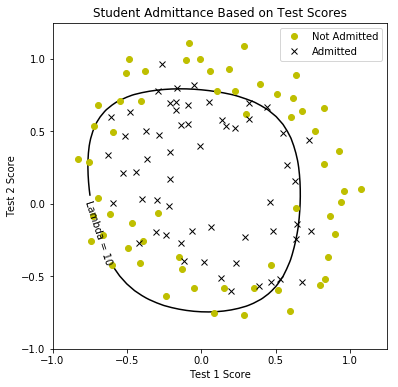

In [25]:
def plotDecBound(lamda):
    theta_ans, nfuneval, rc = optimize.fmin_tnc(func=cost, x0=theta_init, fprime=grad, args=(Xmap, y, lamda)) 
    plotData(X,0)
    x_range = np.arange(-1,1.3,.05)
    y_range = np.arange(-1,1.3,.05)
    z = np.zeros((x_range.size, y_range.size))
    xx = x_range.reshape((x_range.size,1))
    yy = y_range.reshape((y_range.size,1))
    for i in range(len(x_range)):
        for j in range(len(y_range)):
             z[i,j] = np.dot(mapFeature(np.array([xx[i,0]]), np.array([yy[j,0]]), 6), theta_ans)

    z = z.T
    lamlabel = { 0:'Lambda = {}'.format(lamda)}
    CS = plt.contour(x_range,y_range,z, colors='k',levels=[0])
    plt.clabel(CS, inline=1, fontsize=10, fmt=lamlabel)

plotDecBound(0)
plotDecBound(1)
plotDecBound(10)